In [31]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

# Mounting my own google drive to import the dataset

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# Read the dataset file

df = pd.read_csv('/content/drive/MyDrive/mall_customers_dataset.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
# Only these two features are necessary for segmentation into clusters

X = df[['Annual Income (k$)','Spending Score (1-100)']]

# Scaling the feature matrix
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

pd.DataFrame(X,columns=['Annual Income (k$)','Spending Score (1-100)']).head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


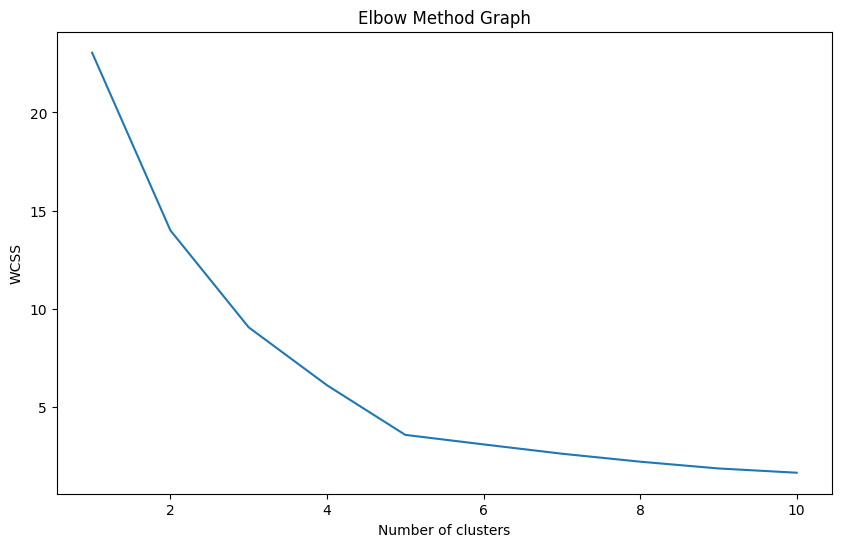

In [34]:
# Applying the Elbow Method to obtain information about optimal no. of clusters for segmentation

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=250,n_init=10,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

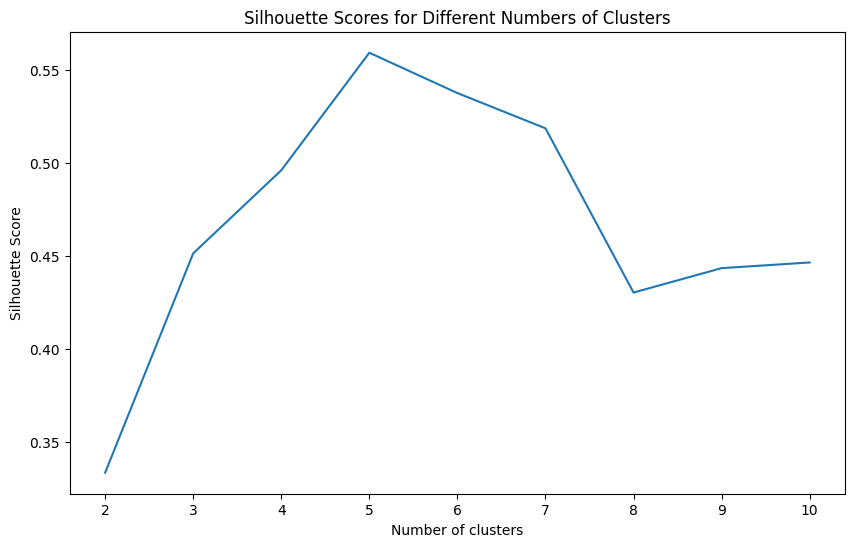

In [35]:
# Checking the silhouette scores for finding out the optimal no. of clusters

silhouette_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=250,n_init=10,random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X,cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11),silhouette_scores)
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

n_clusters = 5

In [36]:
# Applying the optimal number of clusters obtained to do the final segmentation task in KMeans clustering

model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=250, n_init=10, random_state=42)
cluster_labels = model.fit_predict(X)
df['cluster_obtained'] = cluster_labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_obtained
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


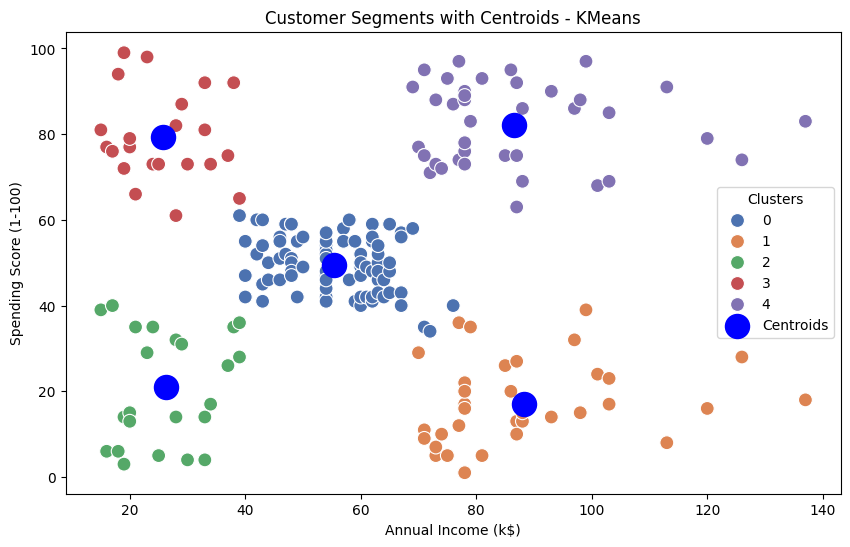

In [37]:
# Visualizing the clusters with the centroids in KMeans clustering

centroids = scaler.inverse_transform(model.cluster_centers_)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_obtained', data=df, palette='deep', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='blue', label='Centroids')
plt.title('Customer Segments with Centroids - KMeans')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Clusters')
plt.show()

In [38]:
# Applying the optimal number of clusters obtained to do the final segmentation task in Hierarchical clustering

model_hier = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels_hier = model_hier.fit_predict(X)
df1 = df.drop('cluster_obtained',axis=1)
df1['cluster_obtained_hier'] = cluster_labels_hier
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_obtained_hier
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


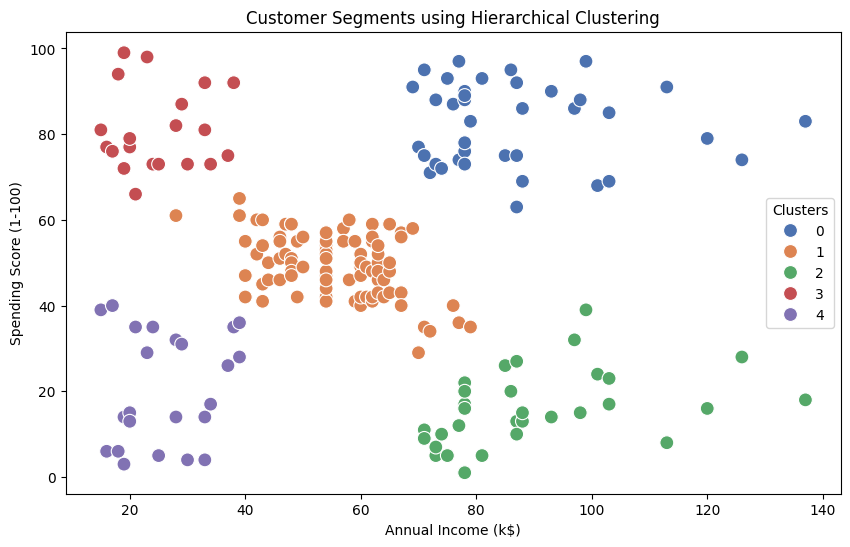

In [39]:
# Visualizing the clusters obtained in Hierarchical clustering

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_obtained_hier', data=df1, palette='deep', s=100)
plt.title('Customer Segments using Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Clusters')
plt.show()

In [40]:
# Comparing the silhoeuette scores for both cluster methods

print("Silhouette Score for KMeans Clustering:", round(silhouette_score(X, cluster_labels),2))
print("Silhouette Score for Hierarchical Clustering:", round(silhouette_score(X, cluster_labels_hier),2))

Silhouette Score for KMeans Clustering: 0.56
Silhouette Score for Hierarchical Clustering: 0.56


**Conclusion** <br>
Hence we have segmented the data using KMeans clustering and Hierarchical clustering techniques.